# Importing necessary modules

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Loading dataset

In [77]:
parquet_file=r'C:/Users/Acer/Downloads/data.parquet'
data = pd.read_parquet(parquet_file,engine='auto')


# Handling missing values by filling with the mean of the previous 10 data points and calculating spread

In [84]:
data.fillna(data.rolling(10, min_periods=1).mean(), inplace=True)
data['Spread'] = data['banknifty'] - data['nifty']

# Implementing Z-score strategy

In [85]:
# Calculate z-score
data['Z_Score'] = zscore(data['Spread'])

# Define trading signals based on z-score threshold
threshold = 1.5
data['Signal'] = np.where(data['Z_Score'] > threshold, -1, np.where(data['Z_Score'] < -threshold, 1, 0))

# Calculate Profit-loss
data['P_L'] = data['Spread'] * (data['tte'] ** 0.7)

# Backtesting the z-score based trading system
data['Returns'] = data['Signal'].shift(1) * data['P_L']
data['Cumulative_Returns'] = data['Returns'].cumsum()

# Plotting the trading signals

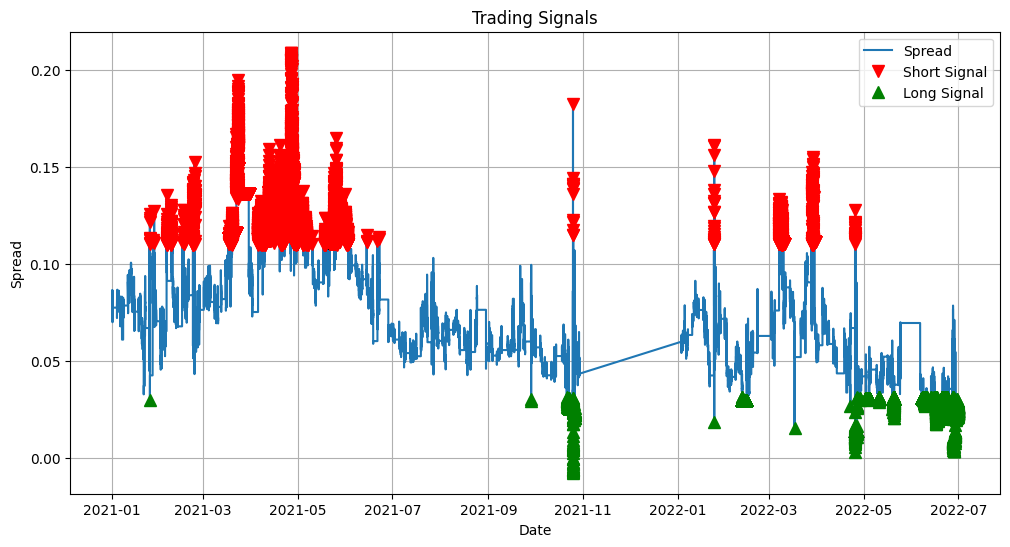

In [81]:
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Spread'], label='Spread')
plt.plot(data[data['Signal'] == -1].index, data['Spread'][data['Signal'] == -1], 'rv', markersize=8, label='Short Signal')
plt.plot(data[data['Signal'] == 1].index, data['Spread'][data['Signal'] == 1], 'g^', markersize=8, label='Long Signal')
plt.title('Trading Signals')
plt.xlabel('Date')
plt.ylabel('Spread')
plt.legend()
plt.grid(True)
plt.show()

# Performance metrics

In [86]:
sharpe_ratio_zscore = (data['Returns'].mean()-.001) / data['Returns'].std()
absolute_pl_zscore = data['Cumulative_Returns'].iloc[-1]
drawdown_zscore = (data['Cumulative_Returns'] - data['Cumulative_Returns'].cummax()).min()

print("Z-Score Based Strategy Performance Metrics:")
print("Sharpe Ratio:", sharpe_ratio_zscore)
print("Absolute P/L:", absolute_pl_zscore)
print("Drawdown:", drawdown_zscore)

Z-Score Based Strategy Performance Metrics:
Sharpe Ratio: -0.2797142601194906
Absolute P/L: -51257.17188217764
Drawdown: -54766.64689891279
